In [1]:
using GLMakie
GLMakie.activate!()

## Creating SubWindows

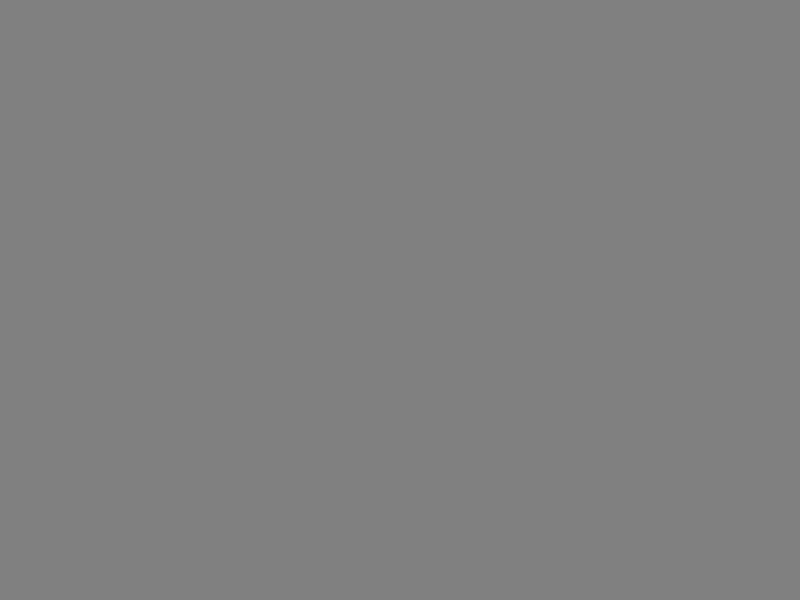

In [2]:
scene = Scene(backgroundcolor=:gray)
subwindow = Scene(scene, px_area=Rect(100, 100, 200, 200), clear=true, backgroundcolor=:white)
scene

## Setup the camera

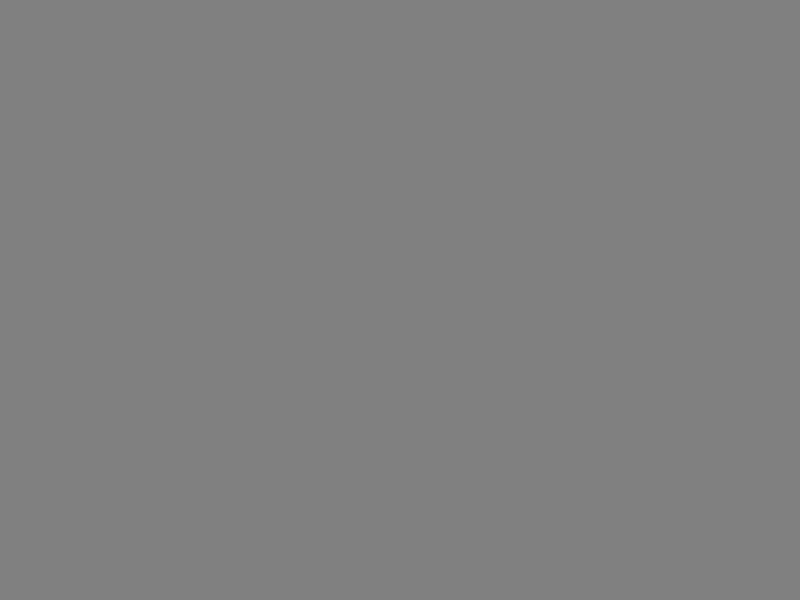

In [3]:
# add camera
cam3d!(subwindow)

# create some meshes
meshscatter!(subwindow, rand(Point3f, 20), color=:gray)

center!(subwindow)
scene

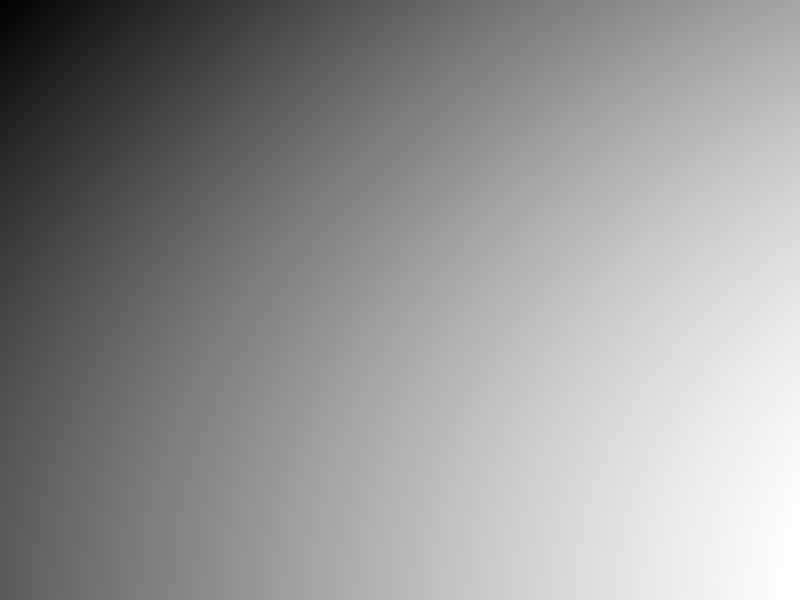

In [4]:
campixel!(scene)
w, h = size(scene) # get the size of the scene in pixels
# this draws a line at the scene window boundary
image!(scene, [sin(i/w) + cos(j/h) for i in 1:w, j in 1:h])
scene

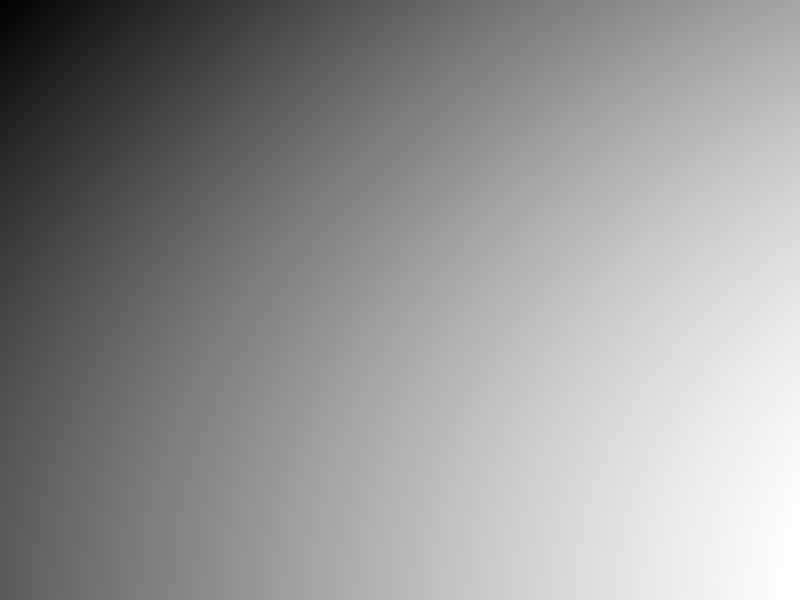

In [5]:
translate!(scene.plots[1], 0, 0, -1000)
scene

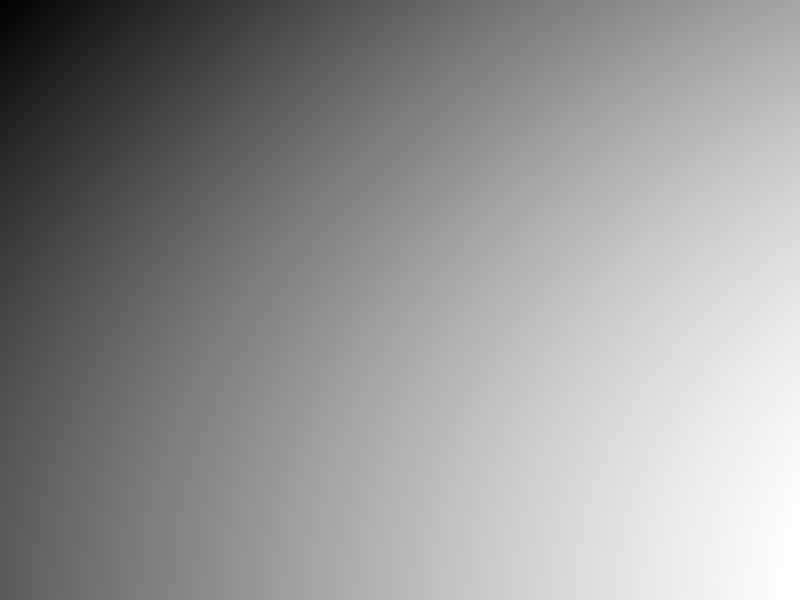

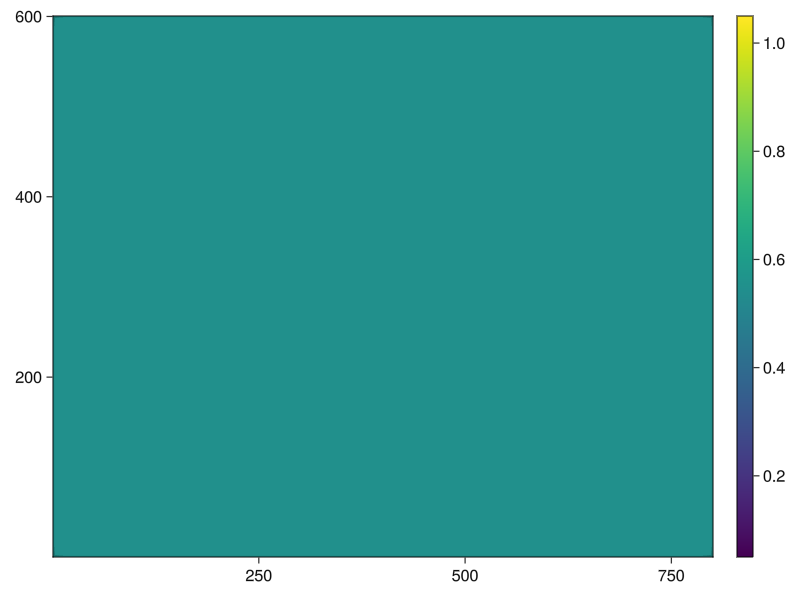

In [6]:
screen = display(scene) # use display, to get a reference to the screen object
depth_color = GLMakie.depthbuffer(screen)
close(screen)
# Look at result:
f, ax, pl = heatmap(depth_color)
Colorbar(f[1, 2], pl)
f

In [7]:
scene.events

Events:
  window_area:      GeometryBasics.HyperRectangle{2, Int64}([0, 0], [800, 600])
  window_dpi:       227.0391061452514
  window_open:      false
  mousebutton:      Makie.MouseButtonEvent(Makie.Mouse.none, Makie.Mouse.release)
  mousebuttonstate: Set{Makie.Mouse.Button}()
  mouseposition:    (0.0, 0.0)
  scroll:           (0.0, 0.0)
  keyboardbutton:   Makie.KeyEvent(Makie.Keyboard.unknown, Makie.Keyboard.release)
  keyboardstate:    Set{Makie.Keyboard.Button}()
  unicode_input:     
  dropped_files:    String[]
  hasfocus:         false
  entered_window:   false


# Projections and Camera

### Draw a rectangle outline

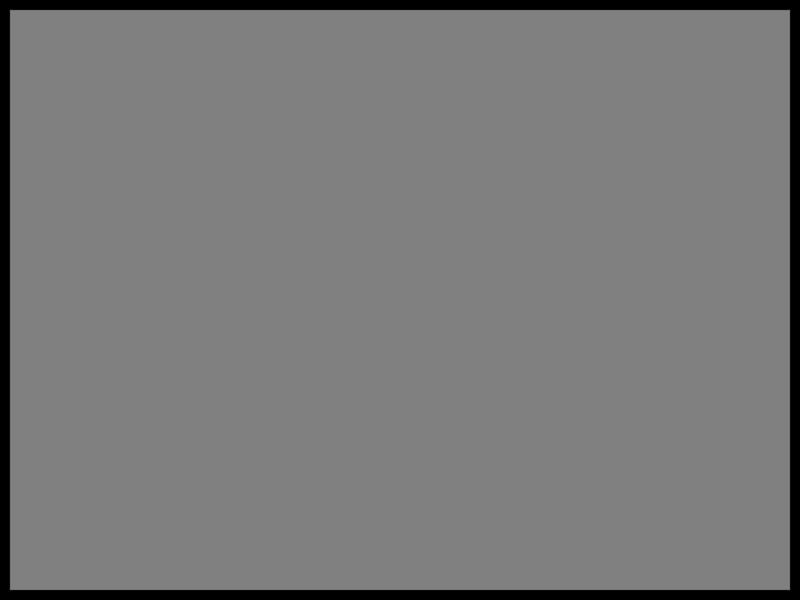

In [8]:
scene = Scene(backgroundcolor=:gray)
lines!(scene, Rect2f(-1, -1, 2, 2), linewidth=20, color=:black)
scene

### Accessing the camera

In [9]:
cam = Makie.camera(scene) # this is how to access the scenes camera

Camera:
  0 steering observables connected
  pixel_space: Float32[0.0025 0.0 0.0 -1.0; 0.0 0.0033333334 0.0 -1.0; 0.0 0.0 -0.0001 -0.0; 0.0 0.0 0.0 1.0]
  view: Float32[1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
  projection: Float32[1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
  projectionview: Float32[1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
  resolution: Float32[800.0, 600.0]
  eyeposition: Float32[1.0, 1.0, 1.0]


### Orthographic projection

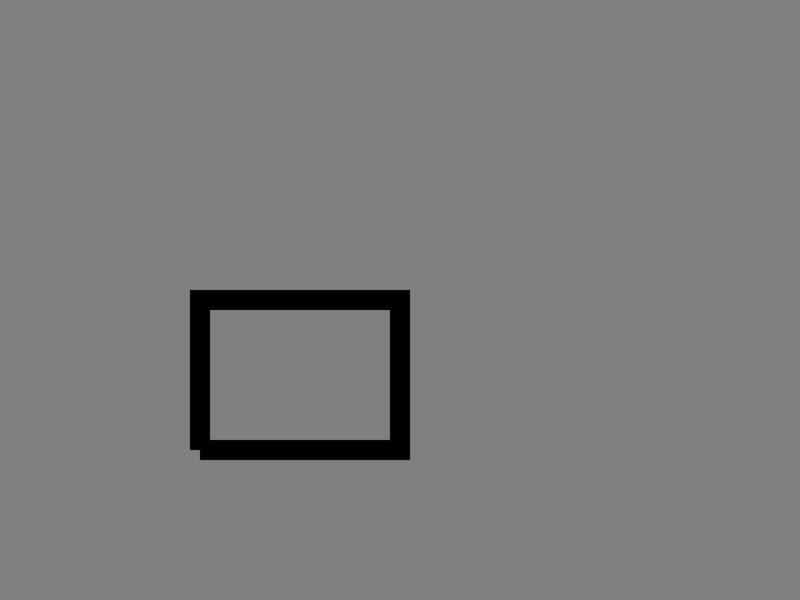

In [10]:
cam.projection[] = Makie.orthographicprojection(-3f0, 5f0, -3f0, 5f0, -100f0, 100f0)
scene

### Perspective projection

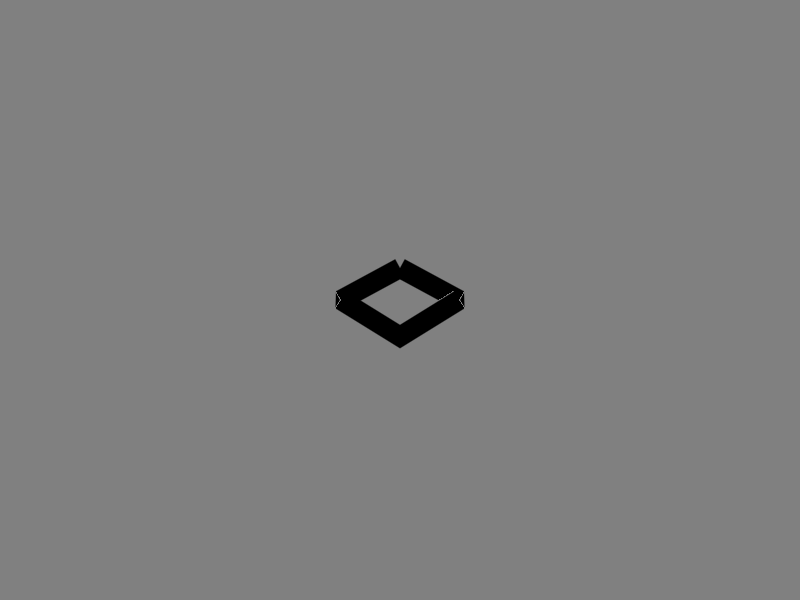

In [11]:
w, h = size(scene)
nearplane = 0.1f0
farplane = 100f0
aspect = Float32(w / h)
cam.projection[] = Makie.perspectiveprojection(45f0, aspect, nearplane, farplane)
# Now, we also need to change the view matrix
# to "put" the camera into some place.
eyeposition = Vec3f(10)
lookat = Vec3f(0)
upvector = Vec3f(0, 0, 1)
cam.view[] = Makie.lookat(eyeposition, lookat, upvector)
scene

# Interaction

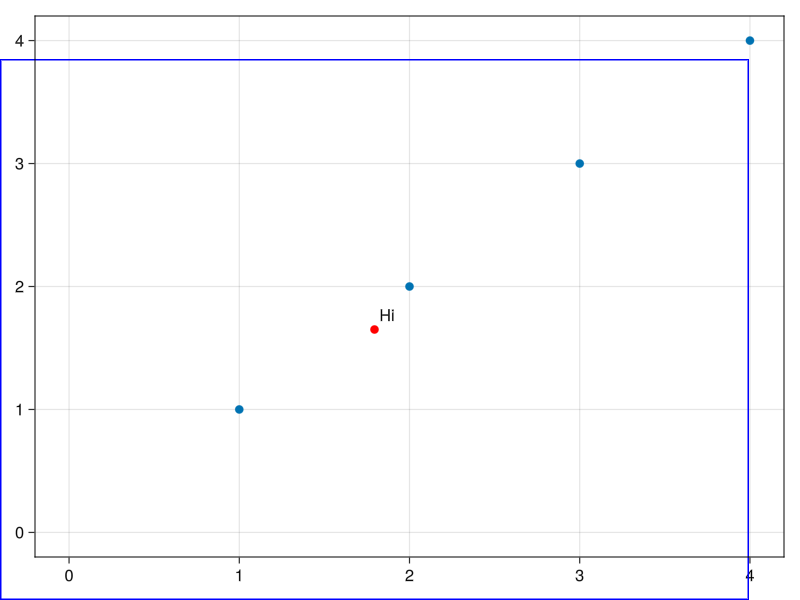

In [12]:
figure, axis, plot_object = scatter(1:4)
relative_projection = Makie.camrelative(axis.scene);
scatter!(relative_projection, [Point2f(0.5)], color=:red)
# offset & text are in pixelspace
text!(relative_projection, "Hi", position=Point2f(0.5), offset=Vec2f(5))
lines!(relative_projection, Rect(0, 0, 1, 1), color=:blue, linewidth=3)
figure

# World Transformations

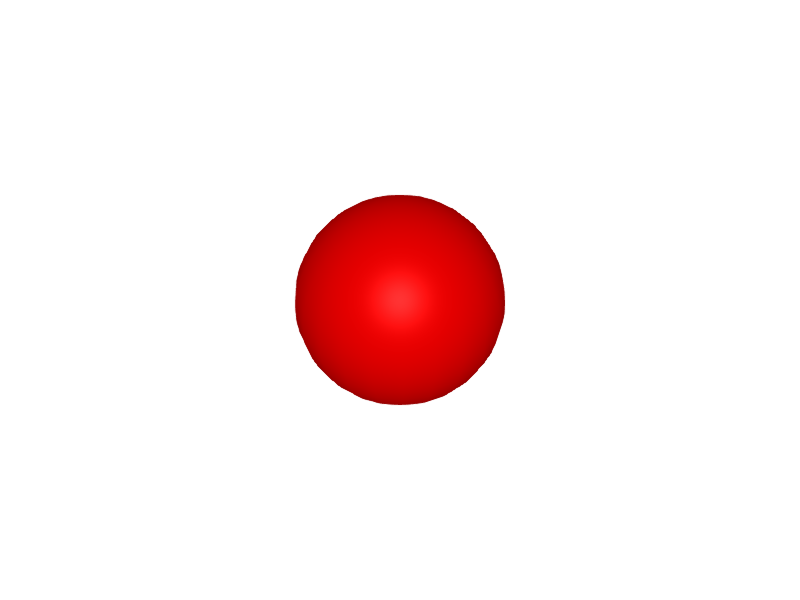

In [13]:
# create scene and add camera
scene = Scene()
cam3d!(scene)

# add a sphere
sphere_plot = mesh!(scene, Sphere(Point3f(0), 0.5), color=:red)

# scale sphere by x1.5
scale!(scene, 1.5, 1.5, 1.5)

# rotation (angle-axis)
rotate!(scene, Quaternion(0,0,0,1)) # 0.5 rad around the y axis
scene

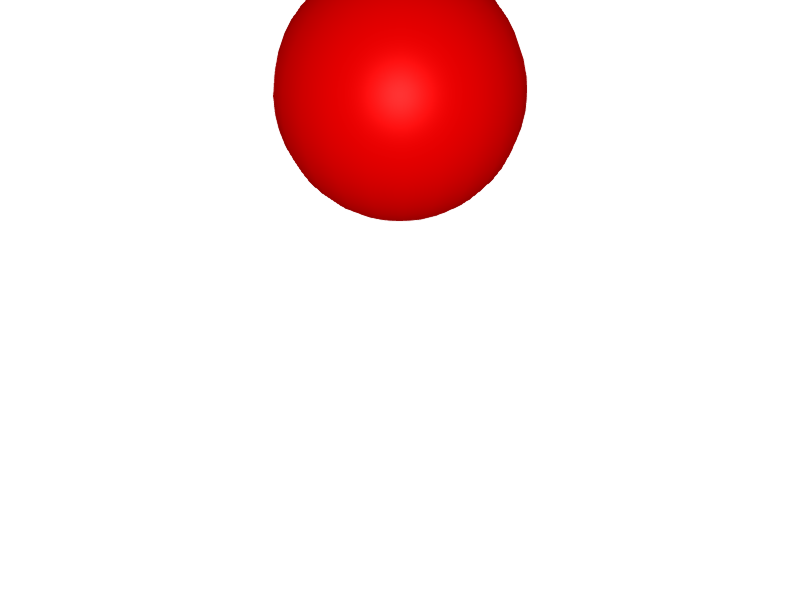

In [14]:
# translate along z axis by 1
translate!(sphere_plot, Vec3f(0, 0, 1))
scene

## Robot arm example

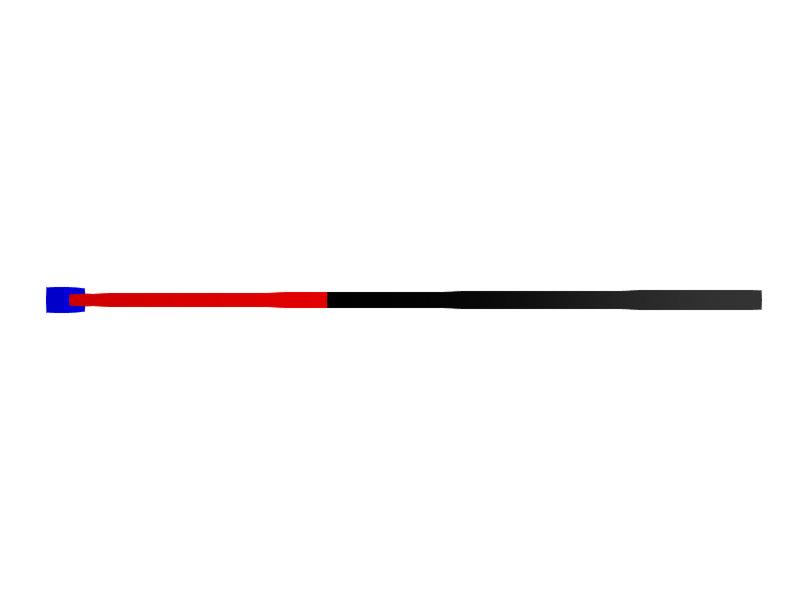

GLMakie.Screen(...)

In [15]:
parent = Scene()
cam3d!(parent)

# One can set the camera lookat and eyeposition, by getting the camera controls and using `update_cam!`
camc = cameracontrols(parent)
update_cam!(parent, camc, Vec3f(0, 8, 0), Vec3f(4.0, 0, 0))

s1 = Scene(parent, camera=parent.camera)
mesh!(s1, Rect3f(Vec3f(0, -0.1, -0.1), Vec3f(5, 0.2, 0.2)))
s2 = Scene(s1, camera=parent.camera)
mesh!(s2, Rect3f(Vec3f(0, -0.1, -0.1), Vec3f(5, 0.2, 0.2)), color=:red)
translate!(s2, 5, 0, 0)
s3 = Scene(s2, camera=parent.camera)
mesh!(s3, Rect3f(Vec3f(-0.2), Vec3f(0.4)), color=:blue)
translate!(s3, 5, 0, 0)

display(parent)

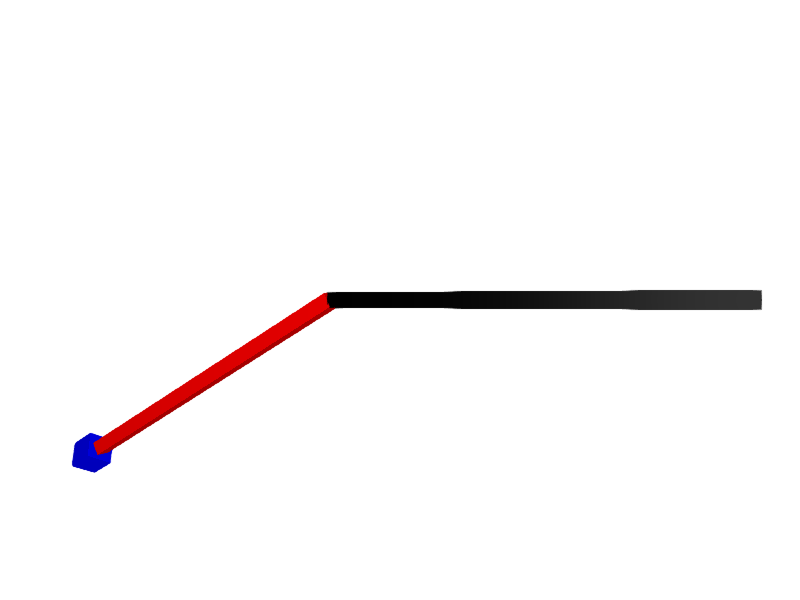

In [16]:
# Now, rotate the "joints"
rotate!(s2, Vec3f(0, 1, 0), 0.5)
rotate!(s3, Vec3f(1, 0, 0), 0.5)
parent

# Meshes

### Loading a mesh

In [17]:
using FileIO

# load the model file
airplane_mesh = load(assetpath(pwd() * "/assets/airplane.stl"));
tailsitter_mesh = load(assetpath(pwd() * "/assets/tailsitter.stl"));
propeller_mesh = load(assetpath(pwd() * "/assets/propeller_cw.stl"));

## Airplane scene plot

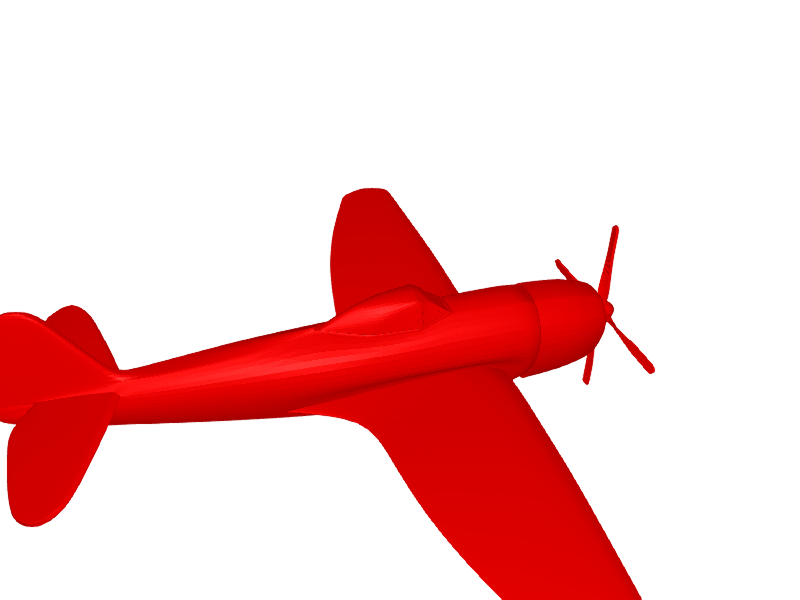

GLMakie.Screen(...)

In [18]:
# create scene and add camera
scene = Scene()
cam3d!(scene)

# add a sphere
airplane_plot = mesh!(scene, airplane_mesh , color=:red)

# scale sphere by x1.5
scale!(scene, 1.0, 1.0, 1.0)

# rotation (angle-axis)
rotate!(scene, Vec3f(0, 0, 1), -0.5) # 0.5 rad around the y axis
display(scene)

## Airplane axis3 plot

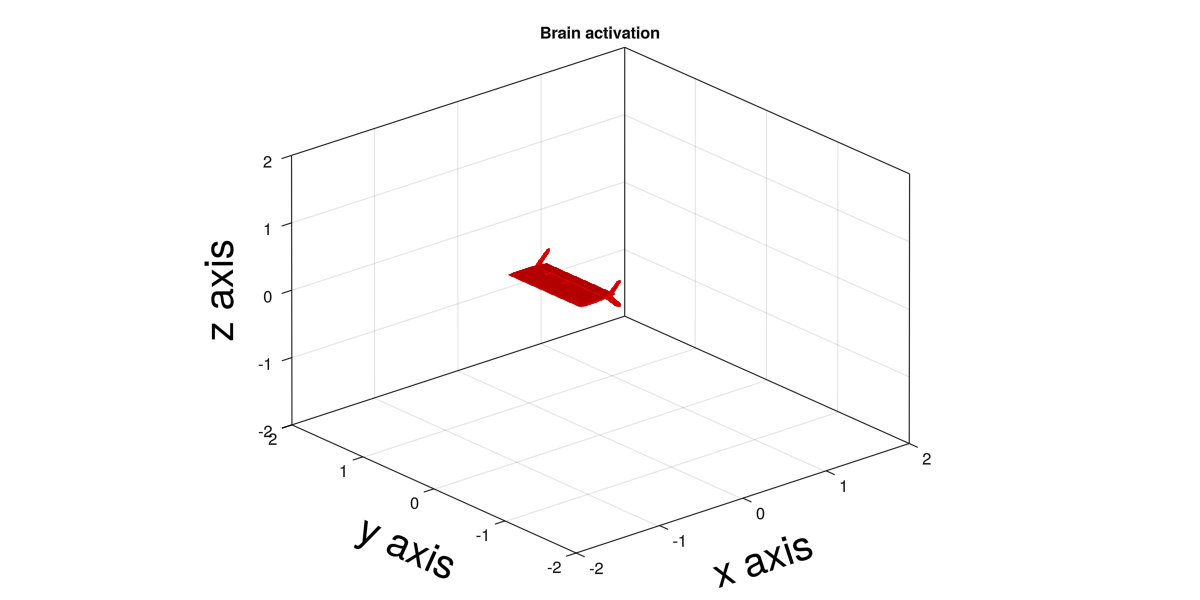

GLMakie.Screen(...)

In [20]:
fig = Figure(; resolution = (1200,600))

ax3d = Axis3(fig[1, 1], title = "Brain activation", limits =  (-2,2,-2,2,-2,2),
    xlabel="x axis", xlabelsize=40,
    ylabel="y axis", ylabelsize=40,
    zlabel="z axis", zlabelsize=40,
)

m = mesh!(ax3d, tailsitter_mesh , color=:red)

scale!(m, 0.001, 0.001, 0.001)

# center model at the origin
translate!(m, Vec3f(0, 0.5, 0))

# orient along positive x axis
rotate!(m, Vec3f(0, 0, 1), pi) # 0.5 rad around the y axis

# Create a child transformation from the parent
child = Transformation(m)

# get the transformation of the parent
ptrans = Makie.transformation(m)

mesh!(ax3d, propeller_mesh , transformation=child)

display(fig)

## Cart Pendulum in Scene

In [21]:
using GeometryBasics

function meshcube(o=Vec3f(0), sizexyz = Vec3f(1))
    uvs = map(v -> v ./ (3, 2), Vec2f[
    (0, 0), (0, 1), (1, 1), (1, 0),
    (1, 0), (1, 1), (2, 1), (2, 0),
    (2, 0), (2, 1), (3, 1), (3, 0),
    (0, 1), (0, 2), (1, 2), (1, 1),
    (1, 1), (1, 2), (2, 2), (2, 1),
    (2, 1), (2, 2), (3, 2), (3, 1),
    ])
    m = normal_mesh(Rect3f(Vec3f(-0.5) .+ o, sizexyz))
    m = GeometryBasics.Mesh(meta(coordinates(m);
        uv = uvs, normals = normals(m)), faces(m))
end

floor_img = load(assetpath(pwd() * "/assets/checker_repeat.png"));

In [22]:
using MeshIO, FileIO

colors = Dict(
    "cart" => "red",
    "pendulum" => "black",
)
origins = Dict(
    "pendulum" => Point3f(0,0,3.5),
)

rotation_axes = Dict(
    "pendulum" => Vec3f(1, 0, 0),
)

function plot_part!(scene, parent, name::String)
    # load mesh
    stl_file = load(assetpath(pwd() * "/assets/" * name * ".stl"));
    
    # look up color
    color = colors[split(name, "_")[1]]

    # Create a child transformation from the parent
    child = Transformation(parent)

    # get the transformation of the parent
    ptrans = Makie.transformation(parent)

     # get the origin if available
    origin = get(origins, name, nothing)

    # center the mesh to its origin, if we have one
    if !isnothing(origin)
        translate!(child, origin)
    else
       # if we don't have an origin, we need to correct for the parents translation
        translate!(child, -ptrans.translation[])
    end

    # plot the part with transformation & color
    mesh = mesh!(scene, stl_file; color=color, transformation=child)
#    scale!(mesh, 0.1, 0.1, 0.1)
    
    return mesh
    
end

function plot_lego_figure(s, floor=true)
    # Plot hierarchical mesh and put all parts into a dictionary
    figure = Dict()
    figure["cart"] = plot_part!(s, s, "cart")
        figure["pendulum"] = plot_part!(s, figure["cart"], "pendulum")
    
    # add floor
    floor_width = 50;
    floor_mesh = meshcube(Vec3f(0,0,0), Vec3f(floor_width,floor_width,0.01));
    floor = mesh!(s,  floor_mesh; color = floor_img, interpolate=false, diffuse=Vec3f(0.4), specular=Vec3f(0.4))
    
    translate!(floor, Vec3f(-floor_width/2, -floor_width/2, 0))
    
    # add bounding box cube
    
    # plot cube volume 
    bbox_length = 20;
    bbox_width = 10;
    
    mr = Rect3f(Vec3f(-0.5), Vec3f(bbox_length, bbox_width, 10))
    bbox_volume = mesh!(s, mr; color = (:white, 0.25), transparency=true)

    # plot cube wireframe
    bbox_wireframe = wireframe!(s, mr; color = :black, linewidth=0.5)
    
    translate!(bbox_volume, Vec3f(- bbox_length/2, - bbox_width/2, 0))
    translate!(bbox_wireframe, Vec3f(- bbox_length/2, - bbox_width/2, 0))

    return figure
end

LoadError: ArgumentError: Package MeshIO not found in current path.
- Run `import Pkg; Pkg.add("MeshIO")` to install the MeshIO package.

In [23]:
root = Scene(backgroundcolor = :black, resolution=(2880,1800))

s = Scene(root,  backgroundcolor=:white,clear=true)
cam3d!(s)

camc = cameracontrols(s)
update_cam!(s, camc, Vec3f(30, 0, 15), Vec3f(0,0, 0))

figure = plot_lego_figure(s, false)

rotvec = rotation_axes["pendulum"]
bodymesh = figure["pendulum"]

rotate!(bodymesh, rotvec, deg2rad(45))

display(s)

LoadError: UndefVarError: plot_lego_figure not defined

## 3d visualizer as part of app

In [24]:
function add_3d_visualizer(fig::Figure, g_vis::GridLayout)
    lscene = LScene(fig, show_axis=false, scenekw = (backgroundcolor=:black, clear=true))
    
    g_vis_window = GridLayout()
    g_vis_window[1,1] = lscene

    # now you can plot into lscene like you're used to
    s = lscene.scene
    cam3d!(s)

    camc = cameracontrols(s)
    update_cam!(s, camc, Vec3f(30, 0, 15), Vec3f(0,0, 0))

    figure = plot_lego_figure(s, false)

    rotvec = rotation_axes["pendulum"]
    bodymesh = figure["pendulum"]

    rotate!(bodymesh, rotvec, deg2rad(45))
    
    return g_vis_window
end

function add_plots(fig::Figure, g_vis::GridLayout)
    g_plots = GridLayout()

    # Add plots
    g_plots[1, 1] = Axis(fig, title = "Plot 1", titlecolor=:white, titlesize=25) 
    g_plots[1, 2] = Axis(fig, title = "Plot 2", titlecolor=:white, titlesize=25) 
    g_plots[2, 1] = Axis(fig, title = "Plot 3", titlecolor=:white, titlesize=25) 
    g_plots[2, 2] = Axis(fig, title = "Plot 4", titlecolor=:white, titlesize=25) 

   return g_plots
end

add_plots (generic function with 1 method)

In [14]:
set_theme!(backgroundcolor =:black, textcolor=:white)

fig = Figure(resolution = (2880,1800))
# ax = Axis(fig[1, 2])

# add top menu
g_top_menu = GridLayout()
g_top_menu[1,1] =  Label(fig, "Platform:", fontsize = 30)
g_top_menu[1,2] = Menu(fig, options = ["Tailsitter", "Quadcopter"], default = "Tailsitter", cell_color_inactive_even=:green, cell_color_inactive_odd=:gray, fontsize=20)

g_top_menu[1,3] =  Label(fig, "File:", fontsize = 30)
g_top_menu[1,4] = Menu(fig, options = ["A", "B", "C"], default = "A", cell_color_inactive_even=:green, cell_color_inactive_odd=:gray, fontsize=20)

fig[1, 1:2] = g_top_menu

# # add bottom menu
# g_bottom_menu = GridLayout()

# g_msg_box[1:3,1] = Box(fig, color =:yellow,
#                     strokecolor=:green, strokewidth=:10,
#                     padding = (40.0f0, 0,0,0)
#                     )

# # message box

# g_msg_box = GridLayout(alignmode=Outside(40))
# # g_msg_box[1:3,1] = Box(fig, color =:white)

# g_msg_box[1,1] = msg_box = Label(fig,
#     "Left Justified\nSelva1\nSelva1",
#     justification = :center,
#     lineheight = 1.3,
#     fontsize=25,
#     color=:black,
#     tellwidth=false,
#     tellheight=false,
#     halign=:left,
#     padding = (20.0f0, 0.0f0, 0.0f0, 0.0f0)
# )

# g_msg_box[4,1] = msg_box = Textbox(fig, placeholder = "Enter a string...",
#     tellwidth=false,
#     tellheight=false,
#         fontsize=25,
#         halign=:left,
# )

# g_bottom_menu[1,1] = g_msg_box

fig[3, 1] = g_bottom_menu
fig[3, 2] = start_btn = Button(fig, label = "Start", fontsize=50, labelcolor=:black, tellwidth=false, tellheight=false)


 # add visualizer
g_vis = GridLayout()

# visualizer menu 
g_vis_menu = GridLayout()
g_vis_menu[1,1] =  Label(fig, "Visualizer content:", fontsize = 30)
g_vis_menu[1,2] = vis_menu = Menu(fig, options = ["3D Visualizer", "Plots"], default = "3D Visualizer", cell_color_inactive_even=:green, cell_color_inactive_odd=:gray, fontsize=20)


g_vis[1,1] = g_vis_menu
fig[2, 1] = g_vis

# initaly show  3d visualizer
g_vis_window = add_3d_visualizer(fig, g_vis)
g_plots = add_plots(fig, g_vis)

hiddenlayout = GridLayout(bbox = BBox(-200, -100, 0, 100))
hiddenlayout[1,1] = g_plots

g_vis[2,1] = g_vis_window

on(vis_menu.selection) do s 
    if s == "3D Visualizer"
        g_vis[2,1] = g_vis_window
        hiddenlayout[1,1] = g_plots
    elseif s == "Plots"
        g_vis[2,1] = g_plots 
        hiddenlayout[1,1] = g_vis_window
    end
end


# force 3d visualizer to have an length, width of 2/3 relative to screen size
colsize!(fig.layout, 1, Relative(2/3))
rowsize!(fig.layout, 2, Relative(19/20))

display(fig)

GLMakie.Screen(...)

### Cart pendulum in Axis3d

In [806]:
cart_mesh = load(assetpath(pwd() * "/assets/cart.stl"));
pendulum_mesh = load(assetpath(pwd() * "/assets/pendulum.stl"));

fig = Figure(; resolution = (1200,600))

ax3d = Axis3(fig[1, 1], title = "Brain activation", limits =  (-2,2,-2,2,0,2), aspect = (1,1,0.5),
    xlabel="x axis", xlabelsize=40,
    ylabel="y axis", ylabelsize=40,
    zlabel="z axis", zlabelsize=40,
    elevation = 0.2, azimuth = -0.1,
    viewmode = :fitzoom
)

hidedecorations!(ax3d, grid = false, label = true, ticklabels = false, ticks = true)

cart = mesh!(ax3d, cart_mesh, color=:red)
parent = cart

child = Transformation(parent)
# get the transformation of the parent
ptrans = Makie.transformation(parent)
# get the origin if available
origin = Point3f(0,0,3.5)

translate!(child, origin)

pendulum = mesh!(ax3d, pendulum_mesh, color=:black,  transformation=child) 

scale!(cart, 0.1, 0.1, 0.1)

# # orient along positive x axis
rotate!(pendulum, Vec3f(1, 0, 0), -pi/4) # 0.5 rad around the y axis

display(fig)

GLMakie.Screen(...)

# Cube - Beautful Makie

In [653]:
using GLMakie, TestImages
using GeometryBasics, Colors

In [715]:
parent = Scene()

Camera3D(parent; lookat=Vec3f(5,5, 0))
update_cam!(parent, cameracontrols(parent), Vec3f(20, 50, 20), Vec3f(0,0,0))

# plot cube volume 
mr = Rect3f(Vec3f(-0.5), Vec3f(10))
t_cube = mesh!(parent, mr; color = :white, transparency=true)

# plot cube wireframe
wireframe!(parent, mr; color = (:black,100), transparency=true, linewidth=0.01)

display(parent)

GLMakie.Screen(...)

In [701]:
function meshcube(o=Vec3f(0), sizexyz = Vec3f(1))
    uvs = map(v -> v ./ (3, 2), Vec2f[
    (0, 0), (0, 1), (1, 1), (1, 0),
    (1, 0), (1, 1), (2, 1), (2, 0),
    (2, 0), (2, 1), (3, 1), (3, 0),
    (0, 1), (0, 2), (1, 2), (1, 1),
    (1, 1), (1, 2), (2, 2), (2, 1),
    (2, 1), (2, 2), (3, 2), (3, 1),
    ])
    m = normal_mesh(Rect3f(Vec3f(-0.5) .+ o, sizexyz))
    m = GeometryBasics.Mesh(meta(coordinates(m);
        uv = uvs, normals = normals(m)), faces(m))
end


m = meshcube();
floor = meshcube(Vec3f(0,0,0), Vec3f(1,1,0.01));

# +z, +x, +y,
# -x, -y, -z
img = rand(RGBf, 2, 3)
fig, ax, obj = mesh(m; color = img, interpolate=false,
    figure = (; resolution = (1200,600)))

# image with texture
floor_img = load(assetpath(pwd() * "/assets/checker_repeat.png"))
mesh(fig[1,2],m; color = floor_img, interpolate=false)

# image with texture
mesh(fig[2,2], floor; color = floor_img, interpolate=false)

display(fig)

GLMakie.Screen(...)

# Create floor

In [706]:
parent = Scene()

function meshcube(o=Vec3f(0), sizexyz = Vec3f(1))
    uvs = map(v -> v ./ (2, 2), Vec2f[
    (0, 0), (0, 1), (1, 1), (1, 0),
    (1, 0), (1, 1), (2, 1), (2, 0),
    (2, 0), (2, 1), (3, 1), (3, 0),
    (0, 1), (0, 2), (1, 2), (1, 1),
    (1, 1), (1, 2), (2, 2), (2, 1),
    (2, 1), (2, 2), (3, 2), (3, 1),
    ])
    m = normal_mesh(Rect3f(Vec3f(-0.5) .+ o, sizexyz))
    m = GeometryBasics.Mesh(meta(coordinates(m);
        uv = uvs, normals = normals(m)), faces(m))
end

floor_width = 10;
floor = meshcube(Vec3f(0,0,0), Vec3f(floor_width,floor_width,0.01));

Camera3D(parent; lookat=Vec3f(5,5, 0))
update_cam!(parent, cameracontrols(parent), Vec3f(2, 5, 2), Vec3f(5,5, 1))

# cam3d!(parent)
# camc = cameracontrols(parent)
# update_cam!(parent, camc, Vec3f(5, 0, 6), Vec3f(5,5, 0))
""
s1 = Scene(parent, camera=parent.camera)
mesh!(s1,  floor; color = floor_img, interpolate=false)



display(parent)

GLMakie.Screen(...)

In [581]:
translate_cam!(parent, Vec3f(0, -1, 0))

In [583]:
zoom!(parent, 1.5)